# Data Understanding & Preprocessing

In [425]:
import numpy as np
import pandas as pd

In [426]:
df = pd.read_csv("supermarket.csv")

In [427]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [428]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [429]:
print(len(df))
for x in df.columns:
    print(x, len(df[x].unique()), df[x].unique())

1000
Invoice ID 1000 ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2512' '232-11-3025'

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Visualization: 
Let's see the spread of Total across Product line

In [431]:
import seaborn as sns
import matplotlib.pyplot as plt

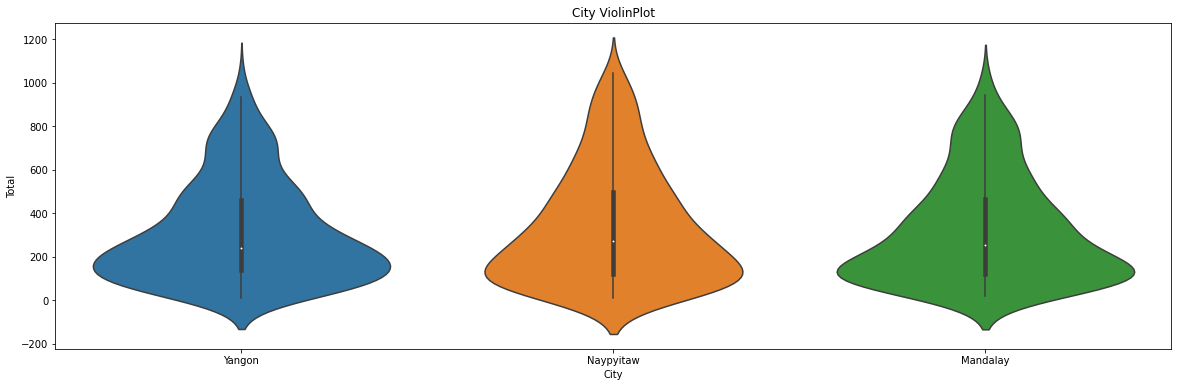

In [432]:
plt.figure(figsize=(20,6))
sns.violinplot(data=df, x="City", y="Total")
plt.title("City ViolinPlot")
plt.show()

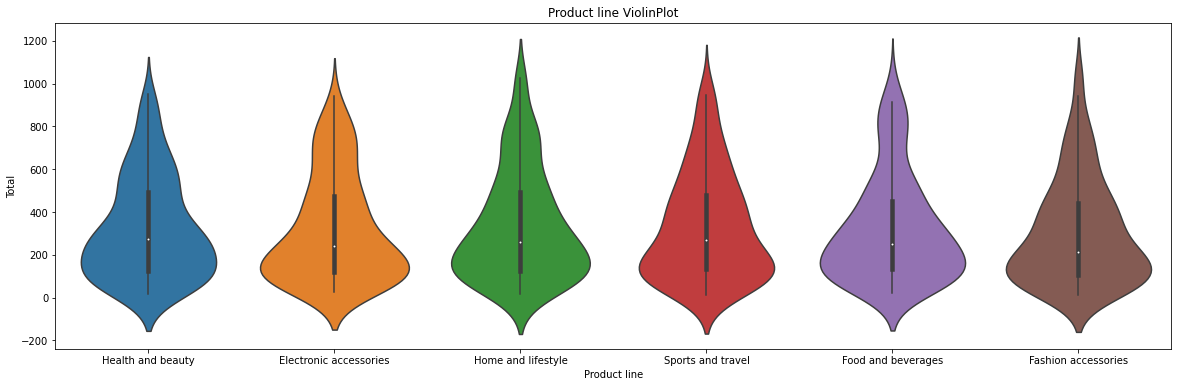

In [433]:
plt.figure(figsize=(20,6))
sns.violinplot(data=df, x="Product line", y="Total")
plt.title("Product line ViolinPlot")
plt.show()

## Trend line: 

In [434]:
#df['Date'] = pd.to_datetime(df['Date']).astype(str) + ' ' + df["Time"].astype(str)

In [435]:
df["Date"] = pd.to_datetime(df["Date"])

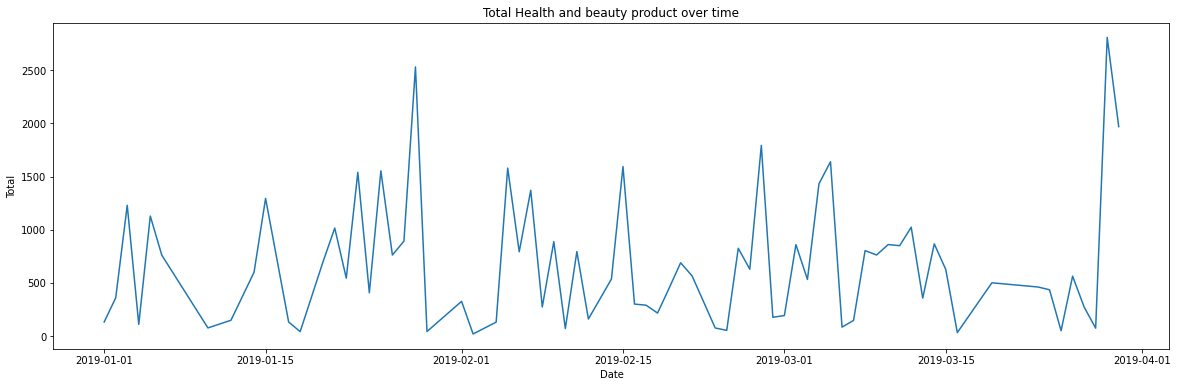

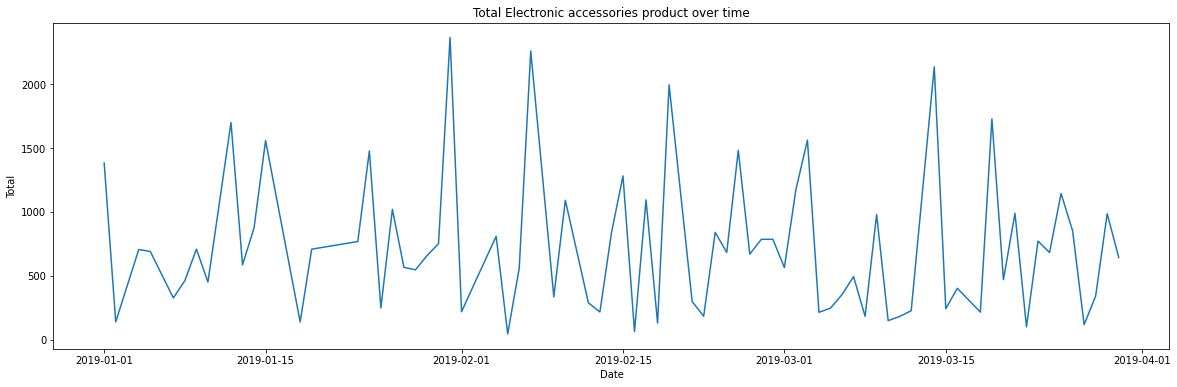

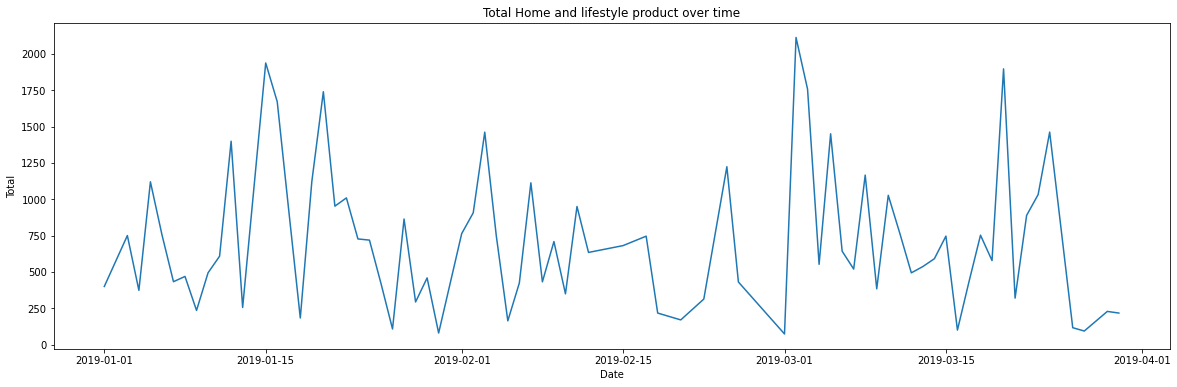

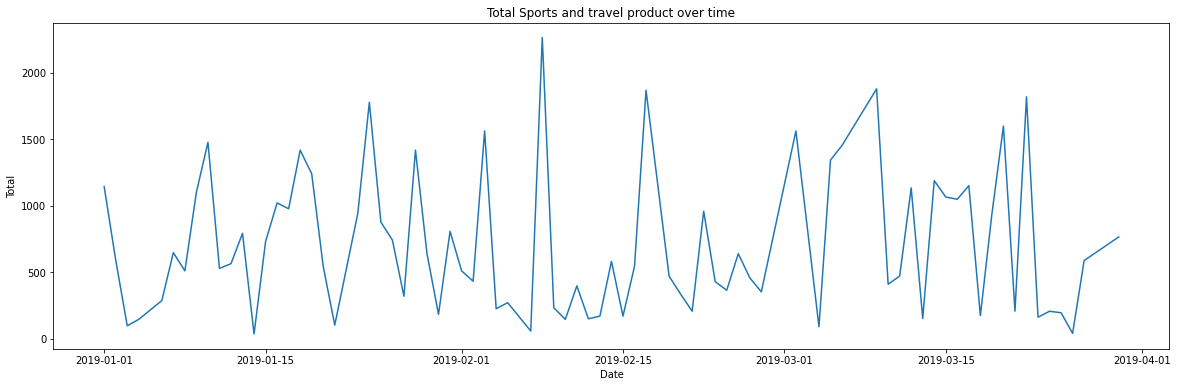

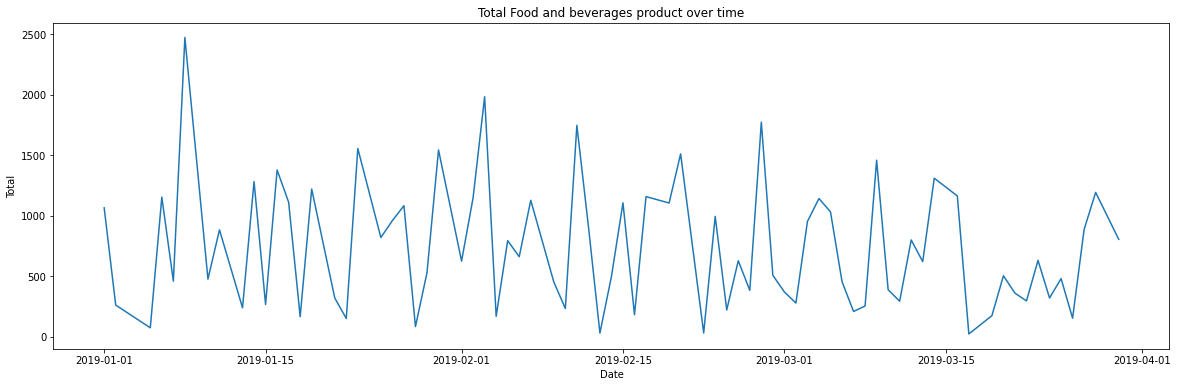

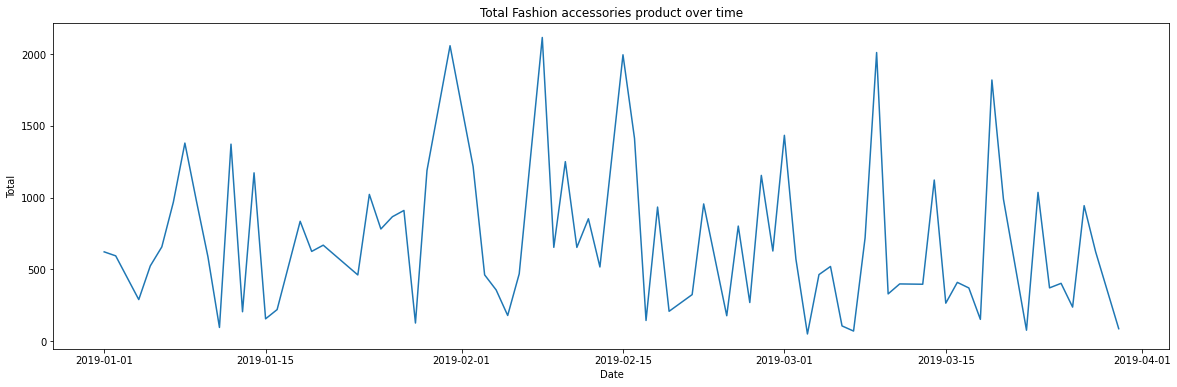

In [436]:
for c in df["Product line"].unique():
    trend_dict = {}
    for key, row in df[df["Product line"] == c].iterrows():
        if row["Date"] in trend_dict:
            trend_dict[row["Date"]] += row["Total"]
        else:
            trend_dict[row["Date"]] = row["Total"]
    t = np.zeros((0,2))
    for x in trend_dict:
        t = np.append(arr=t, values=[[x,trend_dict[x]]], axis=0)
    trend_df = pd.DataFrame(t, columns=["Date", "Total"])
    plt.figure(figsize=(20,6))
    sns.lineplot(data=trend_df, x="Date", y="Total")
    plt.title("Total {} product over time".format(c))

## Correlation

In [437]:
df = df.drop(["gross margin percentage"], axis=1)

In [438]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


<AxesSubplot:>

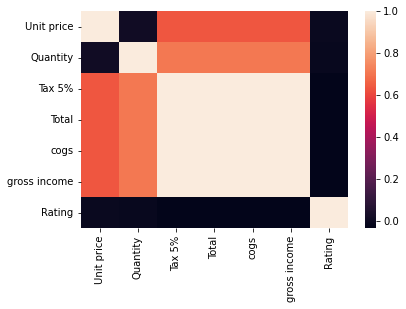

In [439]:
sns.heatmap(df.corr())

## Drop Analysis

In [440]:
df.dtypes

Invoice ID               object
Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Time                     object
Payment                  object
cogs                    float64
gross income            float64
Rating                  float64
dtype: object

In [441]:
df = df.drop(["Date", "Time", "Invoice ID", "Unit price", "Tax 5%"], axis=1)

In [442]:
df = pd.get_dummies(df)

# Modeling

In [443]:
x = df.drop(["Total"], axis=1)
y = df["Total"]

In [444]:
from sklearn.model_selection import train_test_split

In [445]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=24)

In [446]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 23) (200, 23) (800,) (200,)


In [447]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [448]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=24)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=24)),
    'ridge':make_pipeline(Ridge(random_state=24)),
    'lasso':make_pipeline(Lasso(random_state=24)),
    'enet':make_pipeline(ElasticNet(random_state=24)),
}

In [449]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [450]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [451]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(x_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.


rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [453]:
fit_models['rf'].predict(x_test)

array([ 579.617115,   31.910655,  923.475315,  174.5898  ,  206.839605,
        573.15447 ,  287.839335,  298.02507 ,  164.810415,   37.12695 ,
        350.145285,   85.293915,   83.670615,  943.626285,  695.996805,
        733.764885,  103.65432 ,  336.1974  ,  271.250595,  313.788615,
        240.34059 ,  138.74847 ,   83.462715,  167.582625,  479.043075,
        154.516845,  478.646805,  511.22547 ,  223.22433 ,   16.59252 ,
       1023.38775 ,   33.884025,  352.862895,  383.69163 ,   44.781135,
        489.97053 ,  176.874075,  401.46036 ,  440.06718 ,  318.30834 ,
         90.739635,  545.00187 ,  551.74329 ,  620.721045,  131.939745,
        620.810925,  103.083225,  684.63612 ,  263.528265,  935.89188 ,
         97.972035,  147.759675,  104.62389 ,  408.03693 ,  183.095325,
        209.6262  ,  236.05134 ,  578.05041 ,  407.80026 ,  259.00749 ,
        151.60404 ,  440.929125,   93.978465,  734.038515,  132.74163 ,
        680.32797 ,  721.61565 ,  608.89647 ,   57.116535,  869.

# Evaluating

In [454]:
from sklearn.metrics import r2_score, mean_absolute_error

In [455]:
for algo,model in fit_models.items():
    yhat = model.predict(x_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.9999537426145898 MAE:0.8885798250000011
gb scores - R2:0.9999245250100989 MAE:1.599083738748921
ridge scores - R2:1.0 MAE:6.3342781508879395e-09
lasso scores - R2:0.9999999999999997 MAE:3.964698869660666e-06
enet scores - R2:0.9999999999999997 MAE:4.063816221888672e-06


In [457]:
best_model = fit_models['ridge']

# Deployment